In [6]:
# Import library yang diperlukan
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.linear_model
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor, LinearRegression
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn import datasets
import tensorflow as tf # Untuk bagian Logistic Regression, meskipun bab ini tidak secara langsung menggunakan tf.keras
from scipy import stats
import sklearn.base # Untuk clone model dalam Early Stopping

# Konfigurasi matplotlib untuk tampilan inline di Jupyter
%matplotlib inline
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# Bab 4: Melatih Model

**Tujuan:**
Notebook ini bertujuan untuk memperdalam pemahaman dan keterampilan praktis dalam mengimplementasikan konsep inti Machine Learning melalui reproduksi kode dan penjelasan teoritis yang terstruktur, menggunakan buku *Hands-On Machine Learning with Scikit-Learn, Keras, and and TensorFlow: Concepts, Tools, and Techniques to Build Intelligent Systems (O’Reilly)* sebagai referensi utama. Khususnya, kita akan fokus pada Bab 4: *Training Models*.

## 4.1 Regresi Linear (Linear Regression)

Regresi Linear adalah salah satu model Machine Learning yang paling sederhana, digunakan untuk memprediksi nilai target numerik. Model ini mengasumsikan adanya hubungan linier antara fitur input dan nilai target.

**Konsep Teoritis:**

Secara umum, model linear membuat prediksi dengan menghitung jumlah bobot (weighted sum) dari fitur input, ditambah dengan konstanta yang disebut istilah bias (bias term) atau istilah intersep (intercept term).  Persamaannya adalah sebagai berikut:

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots + \theta_n x_n$

Di mana:
* $\hat{y}$ adalah nilai prediksi.
* $n$ adalah jumlah fitur.
* $x_i$ adalah nilai fitur ke-$i$.
* $\theta_j$ adalah parameter model ke-$j$ (termasuk istilah bias $\theta_0$ dan bobot fitur $\theta_1, \theta_2, \dots, \theta_n$).

Persamaan ini dapat ditulis lebih ringkas dalam bentuk vektor:

$\hat{y} = h_\theta(\mathbf{x}) = \mathbf{\theta} \cdot \mathbf{x}$

Di mana:
* $\mathbf{\theta}$ adalah vektor parameter model, berisi istilah bias $\theta_0$ dan bobot fitur $\theta_1$ hingga $\theta_n$.
* $\mathbf{x}$ adalah vektor fitur *instance*, berisi $x_0$ hingga $x_n$, dengan $x_0$ selalu sama dengan 1.
* $\mathbf{\theta} \cdot \mathbf{x}$ adalah produk dot dari vektor $\mathbf{\theta}$ dan $\mathbf{x}$.
* $h_\theta$ adalah fungsi hipotesis, menggunakan parameter model $\mathbf{\theta}$.

Untuk melatih model Regresi Linear, kita perlu mencari nilai $\mathbf{\theta}$ yang meminimalkan *Root Mean Square Error* (RMSE) atau *Mean Squared Error* (MSE).  MSE lebih disukai karena lebih sederhana untuk diminimalkan dan menghasilkan hasil yang sama.

Fungsi biaya MSE untuk model Regresi Linear adalah:

$MSE(\mathbf{X}, h_\theta) = \frac{1}{m} \sum_{i=1}^{m} (\mathbf{\theta}^T \mathbf{x}^{(i)} - y^{(i)})^2$

Di mana:
* $m$ adalah jumlah *instance* dalam dataset.
* $\mathbf{x}^{(i)}$ adalah vektor semua nilai fitur dari *instance* ke-$i$.
* $y^{(i)}$ adalah label (*target value*) dari *instance* ke-$i$.

### 4.1.1 Persamaan Normal (The Normal Equation)

Persamaan Normal adalah solusi *closed-form* untuk menemukan nilai $\mathbf{\theta}$ yang meminimalkan fungsi biaya.  Ini memberikan hasil secara langsung tanpa perlu iterasi.

$\hat{\mathbf{\theta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}$

Di mana:
* $\hat{\mathbf{\theta}}$ adalah nilai $\mathbf{\theta}$ yang meminimalkan fungsi biaya.
* $\mathbf{X}$ adalah matriks fitur input, dengan $x_0 = 1$ ditambahkan ke setiap *instance*.
* $\mathbf{y}$ adalah vektor nilai target.

Theta terbaik (Persamaan Normal):
 [[4.21509616]
 [2.77011339]]
Prediksi untuk X_new:
 [[4.21509616]
 [9.75532293]]


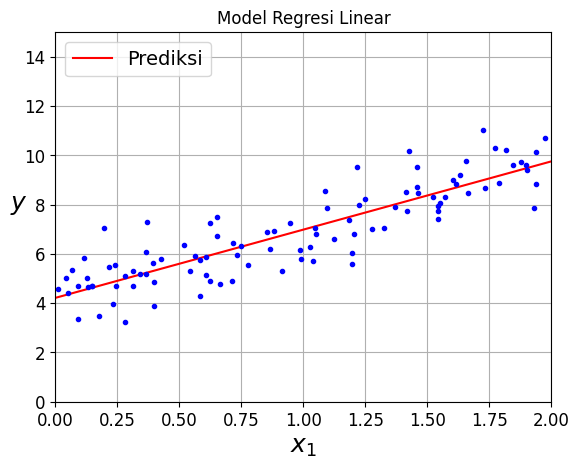

Theta terbaik (Scikit-Learn - intercept_, coef_): [4.21509616] [[2.77011339]]
Prediksi untuk X_new (Scikit-Learn):
 [[4.21509616]
 [9.75532293]]


In [2]:
# Hasilkan data linear buatan
np.random.seed(42)
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1)

# Tambahkan x0 = 1 ke setiap instance (untuk istilah bias)
X_b = np.c_[np.ones((100, 1)), X]

# Hitung theta menggunakan Persamaan Normal
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("Theta terbaik (Persamaan Normal):\n", theta_best)

# Lakukan prediksi
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]
y_predict = X_new_b.dot(theta_best)
print("Prediksi untuk X_new:\n", y_predict)

# Plot hasilnya
plt.plot(X_new, y_predict, "r-", label="Prediksi")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.legend(loc="upper left", fontsize=14)
plt.title("Model Regresi Linear")
plt.grid(True)
plt.show()

# Menggunakan Scikit-Learn
lin_reg = sklearn.linear_model.LinearRegression()
lin_reg.fit(X, y)
print("Theta terbaik (Scikit-Learn - intercept_, coef_):", lin_reg.intercept_, lin_reg.coef_)
print("Prediksi untuk X_new (Scikit-Learn):\n", lin_reg.predict(X_new))

### 4.1.2 Kompleksitas Komputasi (Computational Complexity)

Kompleksitas komputasi untuk membalik matriks $(\mathbf{X}^T \mathbf{X})^{-1}$ dalam Persamaan Normal biasanya sekitar $O(n^{2.4})$ hingga $O(n^3)$, di mana $n$ adalah jumlah fitur.  Ini berarti jika jumlah fitur meningkat, waktu komputasi akan meningkat secara signifikan.

Metode *Singular Value Decomposition* (SVD) yang digunakan oleh kelas `LinearRegression` Scikit-Learn memiliki kompleksitas sekitar $O(n^2)$.  Baik Persamaan Normal maupun SVD menjadi sangat lambat ketika jumlah fitur menjadi sangat besar (misalnya, 100.000).

Namun, keduanya bersifat linear terhadap jumlah *instance* dalam training set ($O(m)$), sehingga efisien untuk training set yang besar, asalkan dapat muat dalam memori.

## 4.2 Gradient Descent

*Gradient Descent* adalah algoritma optimisasi generik yang mampu menemukan solusi optimal untuk berbagai masalah.  Ide utamanya adalah mengubah parameter secara iteratif untuk meminimalkan fungsi biaya.

**Konsep Teoritis:**

Algoritma ini bekerja dengan menginisialisasi parameter model ($\theta$) dengan nilai acak (*random initialization*).  Kemudian, secara bertahap, parameter ditingkatkan sedikit demi sedikit, dengan setiap langkah bertujuan untuk mengurangi fungsi biaya (misalnya, MSE), hingga algoritma konvergen ke minimum.

Parameter penting dalam *Gradient Descent* adalah ukuran langkah, yang ditentukan oleh *hyperparameter learning rate* ($\eta$).
* Jika *learning rate* terlalu kecil, algoritma akan membutuhkan banyak iterasi untuk konvergen dan akan memakan waktu lama.
* Jika *learning rate* terlalu tinggi, algoritma mungkin akan "melompati" minimum dan gagal menemukan solusi yang baik (divergen).

Untuk fungsi biaya MSE pada model Regresi Linear, yang merupakan fungsi cembung (*convex function*) dengan satu minimum global, *Gradient Descent* dijamin akan mendekati minimum global secara arbitrer (jika *learning rate* tidak terlalu tinggi dan kita menunggu cukup lama).

Penting untuk memastikan bahwa semua fitur memiliki skala yang serupa sebelum menggunakan *Gradient Descent*, karena jika tidak, fungsi biaya akan terlihat seperti mangkuk memanjang, yang membuat konvergensi memakan waktu lebih lama.

### 4.2.1 Batch Gradient Descent

Untuk mengimplementasikan *Gradient Descent*, kita perlu menghitung gradien fungsi biaya terhadap setiap parameter model $\theta_j$. Ini disebut turunan parsial.

Vektor gradien ($\nabla_\theta MSE(\theta)$) berisi semua turunan parsial fungsi biaya:

$\nabla_\theta MSE(\theta) = \frac{2}{m} \mathbf{X}^T (\mathbf{X} \mathbf{\theta} - \mathbf{y})$

Setelah mendapatkan vektor gradien, kita bergerak ke arah berlawanan untuk menuruni bukit. Langkah *Gradient Descent* adalah:

$\mathbf{\theta}_{\text{next step}} = \mathbf{\theta} - \eta \nabla_\theta MSE(\theta)$

Di mana:
* $\eta$ adalah *learning rate*.

*Batch Gradient Descent* menggunakan seluruh *batch* data training di setiap langkah.  Hal ini membuatnya sangat lambat pada training set yang sangat besar, tetapi dapat menangani masalah dengan jumlah fitur yang besar lebih cepat daripada Persamaan Normal atau dekomposisi SVD.

Theta terbaik (Batch Gradient Descent):
 [[4.21509616]
 [2.77011339]]


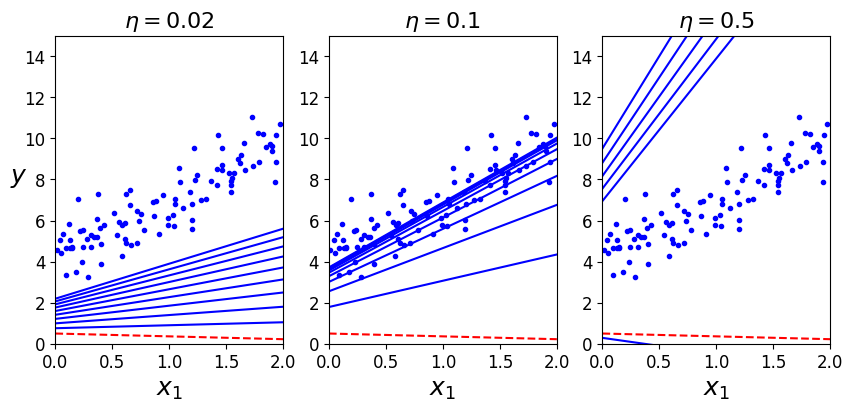

In [3]:
# Atur learning rate dan jumlah iterasi
eta = 0.1  # learning rate
n_iterations = 1000
m = 100  # jumlah instance

# Inisialisasi theta secara acak
theta = np.random.randn(2, 1)

# Loop Gradient Descent
for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("Theta terbaik (Batch Gradient Descent):\n", theta)

# Plot hasil langkah-langkah Gradient Descent
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)

plt.show()

### 4.2.2 Stochastic Gradient Descent (SGD)

*Stochastic Gradient Descent* (SGD) mengatasi masalah kecepatan *Batch Gradient Descent* dengan hanya memilih satu *instance* acak dari training set di setiap langkah untuk menghitung gradien.

**Konsep Teoritis:**

SGD jauh lebih cepat karena memanipulasi data yang sangat sedikit di setiap iterasi.  Ini juga memungkinkan training pada training set yang sangat besar, karena hanya satu *instance* yang perlu ada di memori pada setiap iterasi (*out-of-core learning*).

Namun, karena sifatnya yang stokastik, algoritma ini kurang teratur.  Fungsi biaya akan melambung naik turun, hanya berkurang secara rata-rata.  Meskipun pada akhirnya akan sangat dekat dengan minimum, ia akan terus melambung di sekitarnya.  Namun, pada fungsi biaya yang tidak beraturan, ini dapat membantu algoritma melompat keluar dari minimum lokal, sehingga SGD memiliki peluang lebih baik untuk menemukan minimum global daripada *Batch Gradient Descent*.

Untuk membuat SGD konvergen lebih baik, *learning rate* dapat dikurangi secara bertahap (*learning schedule*).  Langkah-langkah dimulai besar untuk kemajuan cepat dan menghindari minimum lokal, lalu semakin kecil untuk stabil di minimum global.

In [4]:
# Implementasi SGD dengan learning schedule sederhana
n_epochs = 50
t0, t1 = 5, 50 # hyperparameters learning schedule

def learning_schedule(t):
    return t0 / (t + t1)

theta = np.random.randn(2, 1) # Inisialisasi acak
theta_path_sgd = []

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)

print("Theta terbaik (Stochastic Gradient Descent):\n", theta)

# Menggunakan Scikit-Learn SGDRegressor
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X.reshape(-1, 1), y.ravel())

print("Theta terbaik (Scikit-Learn SGDRegressor - intercept_, coef_):", sgd_reg.intercept_, sgd_reg.coef_)

Theta terbaik (Stochastic Gradient Descent):
 [[4.20742938]
 [2.74264448]]
Theta terbaik (Scikit-Learn SGDRegressor - intercept_, coef_): [4.24365286] [2.8250878]


### 4.2.3 Mini-batch Gradient Descent

*Mini-batch Gradient Descent* menghitung gradien pada kumpulan *instance* acak yang lebih kecil, yang disebut *mini-batches*.

**Konsep Teoritis:**

Keuntungan utama Mini-batch GD dibandingkan SGD adalah peningkatan kinerja dari optimisasi hardware operasi matriks, terutama saat menggunakan GPU.

Kemajuan algoritma dalam ruang parameter kurang tidak menentu dibandingkan dengan SGD, terutama dengan *mini-batches* yang cukup besar.  Akibatnya, Mini-batch GD akan berakhir sedikit lebih dekat ke minimum daripada SGD—tetapi mungkin lebih sulit baginya untuk melarikan diri dari minimum lokal (dalam kasus masalah yang mengalami minimum lokal, tidak seperti Regresi Linear).

## 4.3 Regresi Polinomial (Polynomial Regression)

Jika data Anda lebih kompleks dari garis lurus, Anda dapat menggunakan model linear untuk menyesuaikan data nonlinier.  Caranya adalah dengan menambahkan pangkat dari setiap fitur sebagai fitur baru, lalu melatih model linear pada kumpulan fitur yang diperluas ini.

**Konsep Teoritis:**

Teknik ini disebut *Polynomial Regression*.  `PolynomialFeatures` Scikit-Learn dapat digunakan untuk mengubah data training, menambahkan pangkat kedua (polinomial derajat kedua) dari setiap fitur sebagai fitur baru.

Jika ada banyak fitur, *Polynomial Regression* mampu menemukan hubungan antar fitur (yang tidak bisa dilakukan oleh model Regresi Linear biasa).  Ini dimungkinkan karena `PolynomialFeatures` juga menambahkan semua kombinasi fitur hingga derajat yang diberikan.

Intersep dan koefisien (Polynomial Regression):
 [1.78134581] [[0.93366893 0.56456263]]


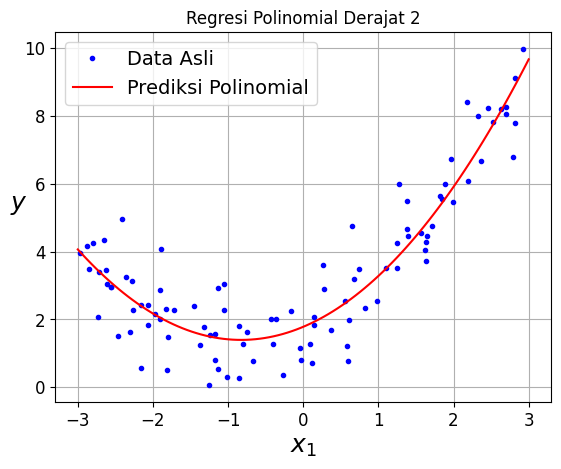

In [7]:
# Hasilkan data nonlinier dan berisik
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

# Ubah data training menggunakan PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

# Latih model Regresi Linear pada data yang diperluas
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("Intersep dan koefisien (Polynomial Regression):\n", lin_reg.intercept_, lin_reg.coef_)

# Plot hasilnya
X_new_plot = np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly_plot = poly_features.transform(X_new_plot)
y_new_plot = lin_reg.predict(X_new_poly_plot)

plt.plot(X, y, "b.", label="Data Asli")
plt.plot(X_new_plot, y_new_plot, "r-", label="Prediksi Polinomial")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.title("Regresi Polinomial Derajat 2")
plt.grid(True)
plt.show()

### 4.3.1 Kurva Pembelajaran (Learning Curves)

*Learning curves* adalah plot kinerja model pada training set dan validation set sebagai fungsi dari ukuran training set (atau iterasi training).

**Konsep Teoritis:**

*Learning curves* dapat membantu mengidentifikasi apakah model mengalami *overfitting* atau *underfitting*.
* Jika model berkinerja baik pada training data tetapi buruk pada validation data, model mengalami *overfitting*.
* Jika model berkinerja buruk pada training data maupun validation data, model mengalami *underfitting*.
* Jika model mengalami *underfitting*, menambahkan lebih banyak contoh training tidak akan membantu.  Anda perlu menggunakan model yang lebih kompleks atau menemukan fitur yang lebih baik.
* Jika model mengalami *overfitting*, menambahkan lebih banyak contoh training hingga error validasi mencapai error training dapat membantu.

**Bias/Variance Trade-off:**

Error generalisasi model dapat diekspresikan sebagai jumlah dari tiga jenis error:
* **Bias:** Bagian dari error generalisasi ini disebabkan oleh asumsi yang salah (misalnya, mengasumsikan data linear padahal sebenarnya kuadratik). Model dengan bias tinggi cenderung *underfit* data training.
* **Variance:** Bagian ini disebabkan oleh sensitivitas berlebihan model terhadap variasi kecil dalam data training. Model dengan banyak derajat kebebasan (misalnya, model polinomial derajat tinggi) cenderung memiliki varians tinggi dan karenanya *overfit* data training.
* **Irreducible error:** Bagian ini disebabkan oleh kebisingan data itu sendiri.  Satu-satunya cara untuk mengurangi bagian error ini adalah dengan membersihkan data.

Meningkatkan kompleksitas model biasanya akan meningkatkan variansnya dan mengurangi biasnya.  Sebaliknya, mengurangi kompleksitas model meningkatkan biasnya dan mengurangi variansnya.  Inilah mengapa ini disebut *trade-off*.

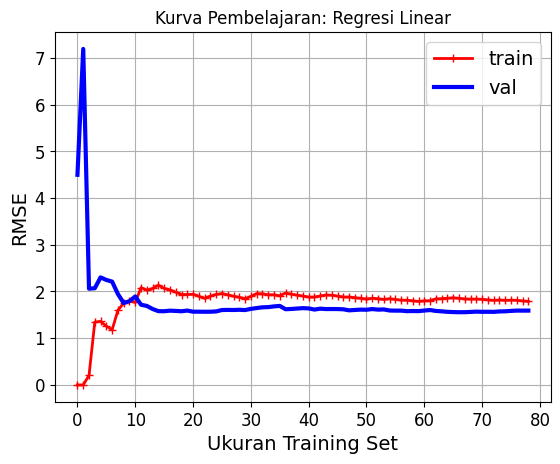

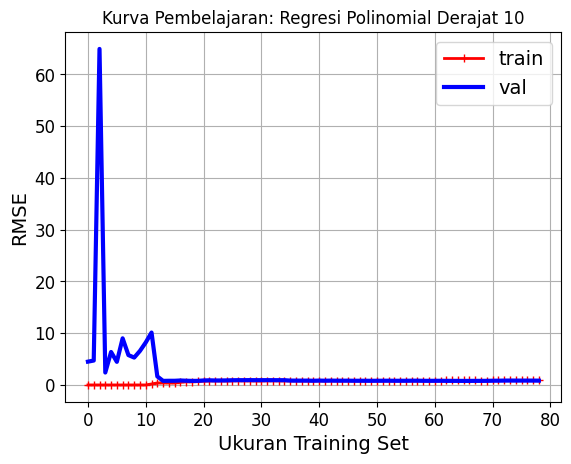

In [8]:
# Fungsi untuk memplot kurva pembelajaran
def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))

    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Ukuran Training Set", fontsize=14)
    plt.ylabel("RMSE", fontsize=14)
    plt.grid(True)

# Kurva pembelajaran untuk model Regresi Linear biasa (underfitting)
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.title("Kurva Pembelajaran: Regresi Linear")
plt.show()

# Kurva pembelajaran untuk model polinomial derajat 10 (overfitting)
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
    ("lin_reg", LinearRegression())
])
plot_learning_curves(polynomial_regression, X, y)
plt.title("Kurva Pembelajaran: Regresi Polinomial Derajat 10")
plt.show()

## 4.4 Model Linear yang Diregulasi (Regularized Linear Models)

Salah satu cara untuk mengurangi *overfitting* adalah dengan meregulasi model (yaitu, membatasinya).  Semakin sedikit derajat kebebasan yang dimilikinya, semakin sulit untuk *overfit* data.  Untuk model linear, regulasi biasanya dicapai dengan membatasi bobot model.

### 4.4.1 Regresi Ridge (Ridge Regression)

*Ridge Regression* (juga disebut *Tikhonov regularization*) adalah versi regulasi dari Regresi Linear: istilah regulasi $\alpha \sum_{i=1}^{n} \theta_i^2$ ditambahkan ke fungsi biaya.  Ini memaksa algoritma pembelajaran tidak hanya menyesuaikan data tetapi juga menjaga bobot model sekecil mungkin.

Istilah regulasi hanya boleh ditambahkan ke fungsi biaya selama training.  Setelah model dilatih, Anda ingin menggunakan ukuran kinerja yang tidak diregulasi untuk mengevaluasi kinerja model.

*Hyperparameter* $\alpha$ mengontrol seberapa banyak Anda ingin meregulasi model.  Jika $\alpha = 0$, maka *Ridge Regression* hanyalah Regresi Linear.  Jika $\alpha$ sangat besar, maka semua bobot akan sangat mendekati nol dan hasilnya adalah garis datar yang melewati rata-rata data.

Penting untuk menskalakan data (misalnya, menggunakan `StandardScaler` Scikit-Learn) sebelum melakukan *Ridge Regression*, karena sensitif terhadap skala fitur input.

Solusi *closed-form* untuk *Ridge Regression*:

$\hat{\mathbf{\theta}} = (\mathbf{X}^T \mathbf{X} + \alpha \mathbf{A})^{-1} \mathbf{X}^T \mathbf{y}$

Di mana $\mathbf{A}$ adalah matriks identitas $(n+1) \times (n+1)$ kecuali dengan 0 di sel kiri atas, yang sesuai dengan istilah bias.

Prediksi Ridge (closed-form): [1.55071465]
Prediksi Ridge (SGDRegressor): [1.47012588]


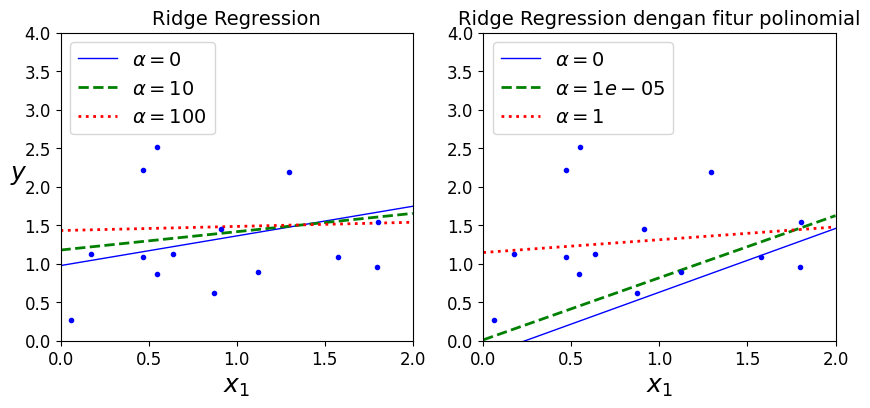

In [9]:
# Siapkan data untuk regulasi (skala fitur)
np.random.seed(42)
m = 20
X_reg = 3 * np.random.rand(m, 1)
y_reg = 1 + 0.5 * X_reg + np.random.randn(m, 1) / 1.5
X_new_reg = np.array([[0], [2]])

# Contoh Ridge Regression dengan solusi closed-form
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X_reg, y_reg)
print("Prediksi Ridge (closed-form):", ridge_reg.predict([[1.5]]))

# Contoh Ridge Regression dengan Stochastic Gradient Descent
sgd_reg_ridge = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_reg_ridge.fit(X_reg, y_reg.ravel())
print("Prediksi Ridge (SGDRegressor):", sgd_reg_ridge.predict([[1.5]]))

# Plot berbagai level regulasi Ridge pada data polinomial
def plot_model(model_class, polynomial_features, alphas, **model_kargs):
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()
        if polynomial_features:
            model = Pipeline([
                ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                ("scaler", StandardScaler()),
                ("lin_reg", model)])
        model.fit(X_reg, y_reg)
        y_new_regul = model.predict(X_new_reg)
        lw = 2 if alpha > 0 else 1
        plt.plot(X_new_reg, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    plt.plot(X_reg, y_reg, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=14)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 4])
    plt.title(r"Ridge Regression, $\alpha={}$".format(alpha), fontsize=14)

plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Ridge, polynomial_features=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Ridge Regression", fontsize=14)
plt.subplot(122)
plot_model(Ridge, polynomial_features=True, alphas=(0, 10**-5, 1), random_state=42)
plt.title("Ridge Regression dengan fitur polinomial", fontsize=14)
plt.show()

### 4.4.2 Regresi Lasso (Lasso Regression)

*Least Absolute Shrinkage and Selection Operator Regression* (biasanya disebut *Lasso Regression*) adalah versi regulasi lain dari Regresi Linear: mirip dengan *Ridge Regression*, ia menambahkan istilah regulasi ke fungsi biaya, tetapi menggunakan norma $\ell_1$ dari vektor bobot, bukan setengah dari kuadrat norma $\ell_2$.

Fungsi biaya *Lasso Regression*:

$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + \alpha \sum_{i=1}^{n} |\theta_i|$

Karakteristik penting dari *Lasso Regression* adalah cenderung menghilangkan bobot fitur yang paling tidak penting (yaitu, menetapkannya ke nol).  Dengan kata lain, *Lasso Regression* secara otomatis melakukan pemilihan fitur (*feature selection*) dan menghasilkan model yang jarang (*sparse model*).

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


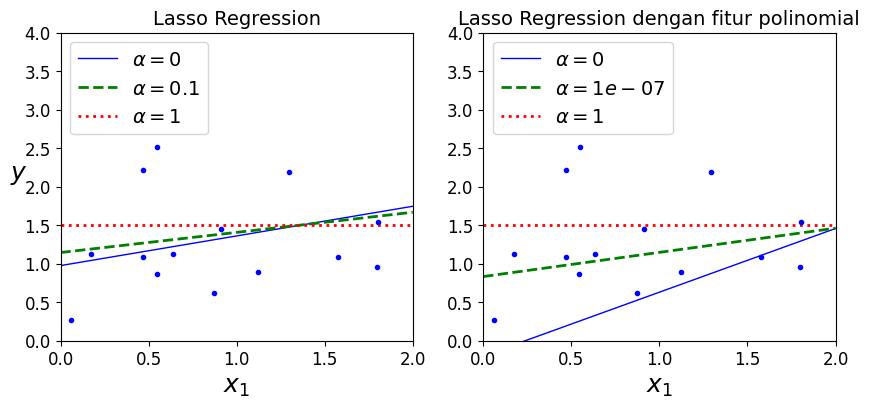

Prediksi Lasso: [1.53788174]
Prediksi Lasso (SGDRegressor): [1.47011206]


In [10]:
# Plot berbagai level regulasi Lasso pada data polinomial
plt.figure(figsize=(10,4))
plt.subplot(121)
plot_model(Lasso, polynomial_features=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.title("Lasso Regression", fontsize=14)
plt.subplot(122)
plot_model(Lasso, polynomial_features=True, alphas=(0, 10**-7, 1), random_state=42)
plt.title("Lasso Regression dengan fitur polinomial", fontsize=14)
plt.show()

# Contoh Lasso Regression dengan Scikit-Learn
lasso_reg = Lasso(alpha=0.1, random_state=42)
lasso_reg.fit(X_reg, y_reg)
print("Prediksi Lasso:", lasso_reg.predict([[1.5]]))

# Contoh Lasso Regression dengan SGDRegressor
sgd_reg_lasso = SGDRegressor(penalty="l1", max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_reg_lasso.fit(X_reg, y_reg.ravel())
print("Prediksi Lasso (SGDRegressor):", sgd_reg_lasso.predict([[1.5]]))

### 4.4.3 Elastic Net

*Elastic Net* adalah jalan tengah antara *Ridge Regression* dan *Lasso Regression*.  Istilah regulasinya adalah campuran sederhana dari kedua istilah regulasi *Ridge* dan *Lasso*, dan Anda dapat mengontrol rasio campuran ($r$).  Ketika $r = 0$, *Elastic Net* setara dengan *Ridge Regression*, dan ketika $r = 1$, setara dengan *Lasso Regression*.

Fungsi biaya *Elastic Net*:

$J(\mathbf{\theta}) = MSE(\mathbf{\theta}) + r \alpha \sum_{i=1}^{n} |\theta_i| + \frac{1 - r}{2} \alpha \sum_{i=1}^{n} \theta_i^2$

*Elastic Net* umumnya lebih disukai daripada *Lasso* karena *Lasso* dapat berperilaku tidak menentu dalam beberapa kasus (ketika beberapa fitur sangat berkorelasi atau ketika ada lebih banyak fitur daripada *instance* training).

In [11]:
# Contoh Elastic Net dengan Scikit-Learn
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X_reg, y_reg)
print("Prediksi Elastic Net:", elastic_net.predict([[1.5]]))

Prediksi Elastic Net: [1.54333232]


### 4.4.4 Penghentian Awal (Early Stopping)

Cara yang sangat berbeda untuk meregulasi algoritma pembelajaran iteratif seperti *Gradient Descent* adalah dengan menghentikan training segera setelah error validasi mencapai minimum.  Ini disebut *early stopping*.

**Konsep Teoritis:**

Seperti yang terlihat pada gambar 4-20 di buku, error validasi awalnya menurun seiring dengan error training, tetapi setelah beberapa saat, error validasi mulai meningkat kembali.  Ini menunjukkan bahwa model mulai *overfit* data training.  Dengan *early stopping*, training dihentikan segera setelah error validasi mencapai minimum.

Ini adalah teknik regulasi yang sederhana dan efisien.  Untuk SGD dan Mini-batch GD, kurva tidak begitu halus, sehingga sulit untuk mengetahui apakah minimum telah tercapai.  Salah satu solusinya adalah berhenti hanya setelah error validasi berada di atas minimum selama beberapa waktu, lalu mengembalikan parameter model ke titik di mana error validasi berada di minimum.

In [18]:
# Contoh Early Stopping
X_train_es, X_val_es, y_train_es, y_val_es = train_test_split(X, y, test_size=0.2, random_state=42)

poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
    ("std_scaler", StandardScaler())
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train_es)
X_val_poly_scaled = poly_scaler.transform(X_val_es)

sgd_reg_es = SGDRegressor(max_iter=1, warm_start=True,
                           penalty=None, learning_rate="constant", eta0=0.0005, random_state=42)

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):
    sgd_reg_es.fit(X_train_poly_scaled, y_train_es.ravel()) # continues where it left off
    y_val_predict = sgd_reg_es.predict(X_val_poly_scaled)
    val_error = mean_squared_error(y_val_es, y_val_predict)
    if val_error < minimum_val_error:
        minimum_val_error = val_error
        best_epoch = epoch
        best_model = sklearn.base.clone(sgd_reg_es)
    # else: # Uncomment to stop training when validation error starts to rise
    #     break

print("Best epoch:", best_epoch)
# print("Best model parameters:", best_model.intercept_, best_model.coef_)

# Plotting (opsional) untuk melihat efek early stopping
# Requires more data points to see the effect clearly
# plt.plot(np.sqrt(train_errors), "r-+", label="Training RMSE")
# plt.plot(np.sqrt(val_errors), "b-", label="Validation RMSE")
# plt.axvline(best_epoch, color='k', linestyle='--', label='Best Epoch')
# plt.legend()
# plt.xlabel("Epoch")
# plt.ylabel("RMSE")
# plt.title("Early Stopping Example")
# plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

Best epoch: 7


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stochastic_gradient.py:1608: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_stocha

## 4.5 Regresi Logistik (Logistic Regression)

*Logistic Regression* (juga disebut *Logit Regression*) umumnya digunakan untuk memperkirakan probabilitas bahwa sebuah *instance* termasuk dalam kelas tertentu (misalnya, berapa probabilitas email ini adalah spam?).  Jika probabilitas yang diperkirakan lebih besar dari 50%, model memprediksi bahwa *instance* tersebut termasuk dalam kelas positif (berlabel "1"), dan jika tidak, model memprediksi bahwa *instance* tersebut tidak termasuk dalam kelas tersebut (yaitu, termasuk dalam kelas negatif, berlabel "0").  Ini menjadikannya pengklasifikasi biner.

### 4.5.1 Memperkirakan Probabilitas (Estimating Probabilities)

Model *Logistic Regression* menghitung jumlah bobot fitur input (ditambah istilah bias), tetapi alih-alih langsung mengeluarkan hasilnya seperti model Regresi Linear, ia mengeluarkan logistik dari hasil ini.

Fungsi logistik ($\sigma(\cdot)$) adalah fungsi sigmoid (berbentuk S) yang mengeluarkan angka antara 0 dan 1:

$\sigma(t) = \frac{1}{1 + \exp(-t)}$

Setelah model *Logistic Regression* memperkirakan probabilitas $p = h_\theta(\mathbf{x})$ bahwa *instance* $\mathbf{x}$ termasuk dalam kelas positif, ia dapat membuat prediksinya $\hat{y}$ dengan mudah:

$\hat{y} = \begin{cases} 0 & \text{if } p < 0.5 \\ 1 & \text{if } p \ge 0.5 \end{cases}$

### 4.5.2 Training dan Fungsi Biaya (Training and Cost Function)

Tujuan training adalah untuk mengatur vektor parameter $\mathbf{\theta}$ sehingga model memperkirakan probabilitas tinggi untuk *instance* positif ($y=1$) dan probabilitas rendah untuk *instance* negatif ($y=0$).  Ide ini ditangkap oleh fungsi biaya untuk sebuah *instance* training $\mathbf{x}$:

$c(\mathbf{\theta}) = \begin{cases} -\log(p) & \text{if } y = 1 \\ -\log(1 - p) & \text{if } y = 0 \end{cases}$

Fungsi biaya pada seluruh training set adalah rata-rata biaya pada semua *instance* training, yang disebut *log loss*:

$J(\mathbf{\theta}) = -\frac{1}{m} \sum_{i=1}^{m} [y^{(i)} \log(p^{(i)}) + (1 - y^{(i)}) \log(1 - p^{(i)})]$

Tidak ada persamaan *closed-form* yang diketahui untuk menghitung $\mathbf{\theta}$ yang meminimalkan fungsi biaya ini. Namun, fungsi biaya ini cembung, sehingga *Gradient Descent* dijamin akan menemukan minimum global.

Turunan parsial dari fungsi biaya terhadap parameter model $\theta_j$:

$\frac{\partial}{\partial \theta_j} J(\mathbf{\theta}) = \frac{1}{m} \sum_{i=1}^{m} (\sigma(\mathbf{\theta}^T \mathbf{x}^{(i)}) - y^{(i)}) x_j^{(i)}$

### 4.5.3 Batas Keputusan (Decision Boundaries)

*Logistic Regression* dapat digunakan untuk memprediksi kelas berdasarkan fitur.  Batas keputusan model adalah kumpulan titik di mana fungsi keputusan sama dengan 0.

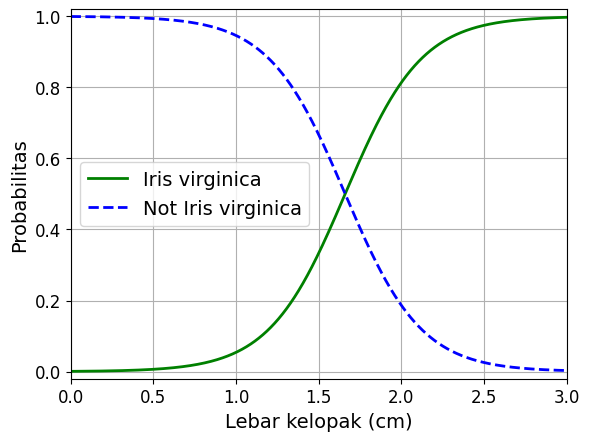

Prediksi kelas untuk [1.7], [1.5]: [1 0]


/tmp/ipython-input-21-4040651053.py:58: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(loc="center left", fontsize=14)


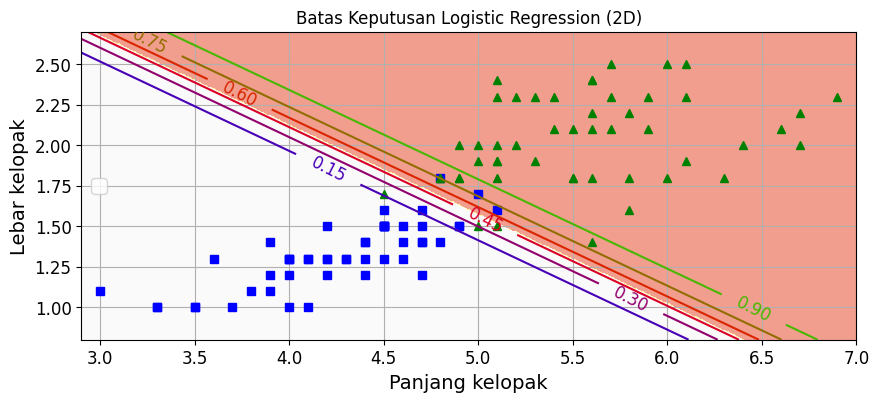

In [21]:
# Muat dataset Iris
iris = datasets.load_iris()
X_iris = iris["data"][:, 3:] # petal width
y_iris = (iris["target"] == 2).astype(int)

# Latih model Logistic Regression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X_iris, y_iris)

# Prediksi probabilitas untuk berbagai lebar kelopak
X_new_iris = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba_iris = log_reg.predict_proba(X_new_iris)

# Plot probabilitas dan batas keputusan
plt.plot(X_new_iris, y_proba_iris[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new_iris, y_proba_iris[:, 0], "b--", linewidth=2, label="Not Iris virginica")
plt.xlabel("Lebar kelopak (cm)", fontsize=14)
plt.ylabel("Probabilitas", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.grid(True)
plt.show()

# Prediksi kelas
print("Prediksi kelas untuk [1.7], [1.5]:", log_reg.predict([[1.7], [1.5]]))

# Contoh dengan dua fitur (lebar dan panjang kelopak)
X_iris_2d = iris["data"][:, (2, 3)] # petal length, petal width
y_iris_2d = (iris["target"] == 2).astype(int)

log_reg_2d = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg_2d.fit(X_iris_2d, y_iris_2d)

# Plot batas keputusan 2D (visualisasi lebih kompleks)
x0, x1 = np.meshgrid(
    np.linspace(2.9, 7, 500).reshape(-1, 1),
    np.linspace(0.8, 2.7, 200).reshape(-1, 1),
)
X_boundary = np.c_[x0.ravel(), x1.ravel()]
y_proba_boundary = log_reg_2d.predict_proba(X_boundary)
y_predict_boundary = log_reg_2d.predict(X_boundary)

zz1 = y_proba_boundary[:, 1].reshape(x0.shape)
zz = y_predict_boundary.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X_iris_2d[y_iris_2d==0, 0], X_iris_2d[y_iris_2d==0, 1], "bs")
plt.plot(X_iris_2d[y_iris_2d==1, 0], X_iris_2d[y_iris_2d==1, 1], "g^")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafafa','#fff59d','#f29e8e'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Panjang kelopak", fontsize=14)
plt.ylabel("Lebar kelopak", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])
plt.title("Batas Keputusan Logistic Regression (2D)")
plt.grid(True)
plt.show()

## 4.6 Regresi Softmax (Softmax Regression)

Model *Logistic Regression* dapat digeneralisasi untuk mendukung banyak kelas secara langsung, tanpa harus melatih dan menggabungkan banyak pengklasifikasi biner.  Ini disebut *Softmax Regression*, atau *Multinomial Logistic Regression*.

**Konsep Teoritis:**

Ide dasarnya sederhana: ketika diberikan sebuah *instance* $\mathbf{x}$, model *Softmax Regression* pertama-tama menghitung skor $s_k(\mathbf{x})$ untuk setiap kelas $k$.  Kemudian, ia memperkirakan probabilitas setiap kelas dengan menerapkan fungsi *softmax* (juga disebut eksponensial yang dinormalisasi) pada skor tersebut.

Skor $s_k(\mathbf{x})$ dihitung sebagai:

$s_k(\mathbf{x}) = \mathbf{x}^T \mathbf{\theta}^{(k)}$

Di mana setiap kelas memiliki vektor parameter khusus sendiri $\mathbf{\theta}^{(k)}$.

Probabilitas $p_k$ bahwa *instance* termasuk dalam kelas $k$ dihitung dengan fungsi *softmax*:

$p_k = \sigma(\mathbf{s}(\mathbf{x}))_k = \frac{\exp(s_k(\mathbf{x}))}{\sum_{j=1}^{K} \exp(s_j(\mathbf{x}))}$

Di mana:
* $K$ adalah jumlah kelas.
* $\mathbf{s}(\mathbf{x})$ adalah vektor yang berisi skor setiap kelas untuk *instance* $\mathbf{x}$.
* $\sigma(\mathbf{s}(\mathbf{x}))_k$ adalah probabilitas perkiraan bahwa *instance* $\mathbf{x}$ termasuk dalam kelas $k$.

Pengklasifikasi *Softmax Regression* memprediksi kelas dengan probabilitas perkiraan tertinggi (yang merupakan kelas dengan skor tertinggi):

$\hat{y} = \underset{k}{\operatorname{argmax}} \, \sigma(\mathbf{s}(\mathbf{x}))_k = \underset{k}{\operatorname{argmax}} \, s_k(\mathbf{x}) = \underset{k}{\operatorname{argmax}} \, (\mathbf{\theta}^{(k)})^T \mathbf{x}$

Fungsi biaya yang digunakan untuk training adalah *cross-entropy*:

$J(\mathbf{\Theta}) = -\frac{1}{m} \sum_{i=1}^{m} \sum_{k=1}^{K} y_k^{(i)} \log(p_k^{(i)})$

Di mana $y_k^{(i)}$ adalah probabilitas target bahwa *instance* ke-$i$ termasuk dalam kelas $k$ (biasanya 1 atau 0).

Vektor gradien dari fungsi biaya ini terhadap $\mathbf{\theta}^{(k)}$ adalah:

$\nabla_{\mathbf{\theta}^{(k)}} J(\mathbf{\Theta}) = \frac{1}{m} \sum_{i=1}^{m} (p_k^{(i)} - y_k^{(i)}) \mathbf{x}^{(i)}$

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Prediksi untuk [5, 2]: [2]
Probabilitas untuk [5, 2]: [[6.21626374e-07 5.73689802e-02 9.42630398e-01]]


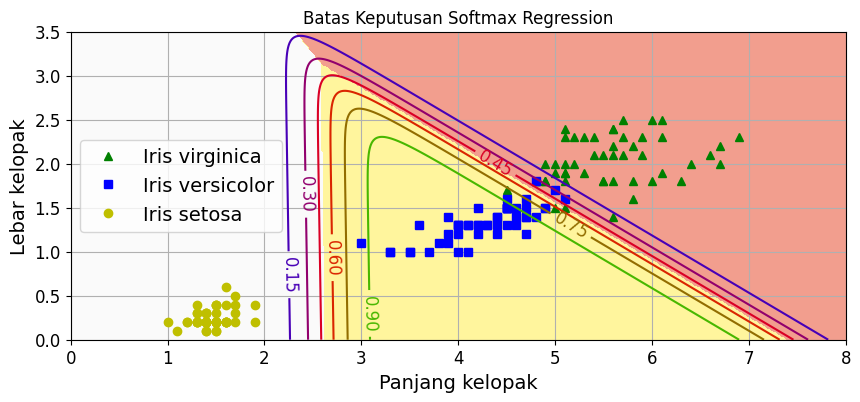

In [22]:
# Contoh Softmax Regression untuk klasifikasi Iris (3 kelas)
X_softmax = iris["data"][:, (2, 3)] # petal length, petal width
y_softmax = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X_softmax, y_softmax)

# Prediksi dan probabilitas
print("Prediksi untuk [5, 2]:", softmax_reg.predict([[5, 2]]))
print("Probabilitas untuk [5, 2]:", softmax_reg.predict_proba([[5, 2]]))

# Plot batas keputusan Softmax Regression (visualisasi lebih kompleks)
x0, x1 = np.meshgrid(
    np.linspace(0, 8, 500).reshape(-1, 1),
    np.linspace(0, 3.5, 200).reshape(-1, 1),
)
X_boundary_softmax = np.c_[x0.ravel(), x1.ravel()]
y_proba_boundary_softmax = softmax_reg.predict_proba(X_boundary_softmax)
y_predict_boundary_softmax = softmax_reg.predict(X_boundary_softmax)

zz1 = y_proba_boundary_softmax[:, 1].reshape(x0.shape)
zz = y_predict_boundary_softmax.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X_softmax[y_softmax==2, 0], X_softmax[y_softmax==2, 1], "g^", label="Iris virginica")
plt.plot(X_softmax[y_softmax==1, 0], X_softmax[y_softmax==1, 1], "bs", label="Iris versicolor")
plt.plot(X_softmax[y_softmax==0, 0], X_softmax[y_softmax==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafafa','#fff59d','#f29e8e'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Panjang kelopak", fontsize=14)
plt.ylabel("Lebar kelopak", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 8, 0, 3.5])
plt.title("Batas Keputusan Softmax Regression")
plt.grid(True)
plt.show()